# Visualizing Results

When debugging it's usually helpful to be able to see what went wrong. Textractor offers simple API to see your output that can help a lot when developing heuristics. 

## Installation

To begin, install the `amazon-textract-textractor` package using pip.

`pip install amazon-textract-textractor`

There are various sets of dependencies available to tailor your installation to your use case. The base package will have sensible default, but you may want to install the PDF extra dependencies if your workflow uses PDFs with `pip install amazon-textract-textractor[pdf]`. You can read more on extra dependencies [in the documentation](https://aws-samples.github.io/amazon-textract-textractor/installation.html)

## Calling Textract

In [1]:
import os
from PIL import Image
from textractor import Textractor
from textractor.data.constants import TextractFeatures

extractor = Textractor(profile_name="default")
document = extractor.analyze_document(
    file_source=Image.open("../../../tests/fixtures/form.png"),
    features=[TextractFeatures.FORMS, TextractFeatures.TABLES],
    save_image=True,
)

Let's look at the asset.

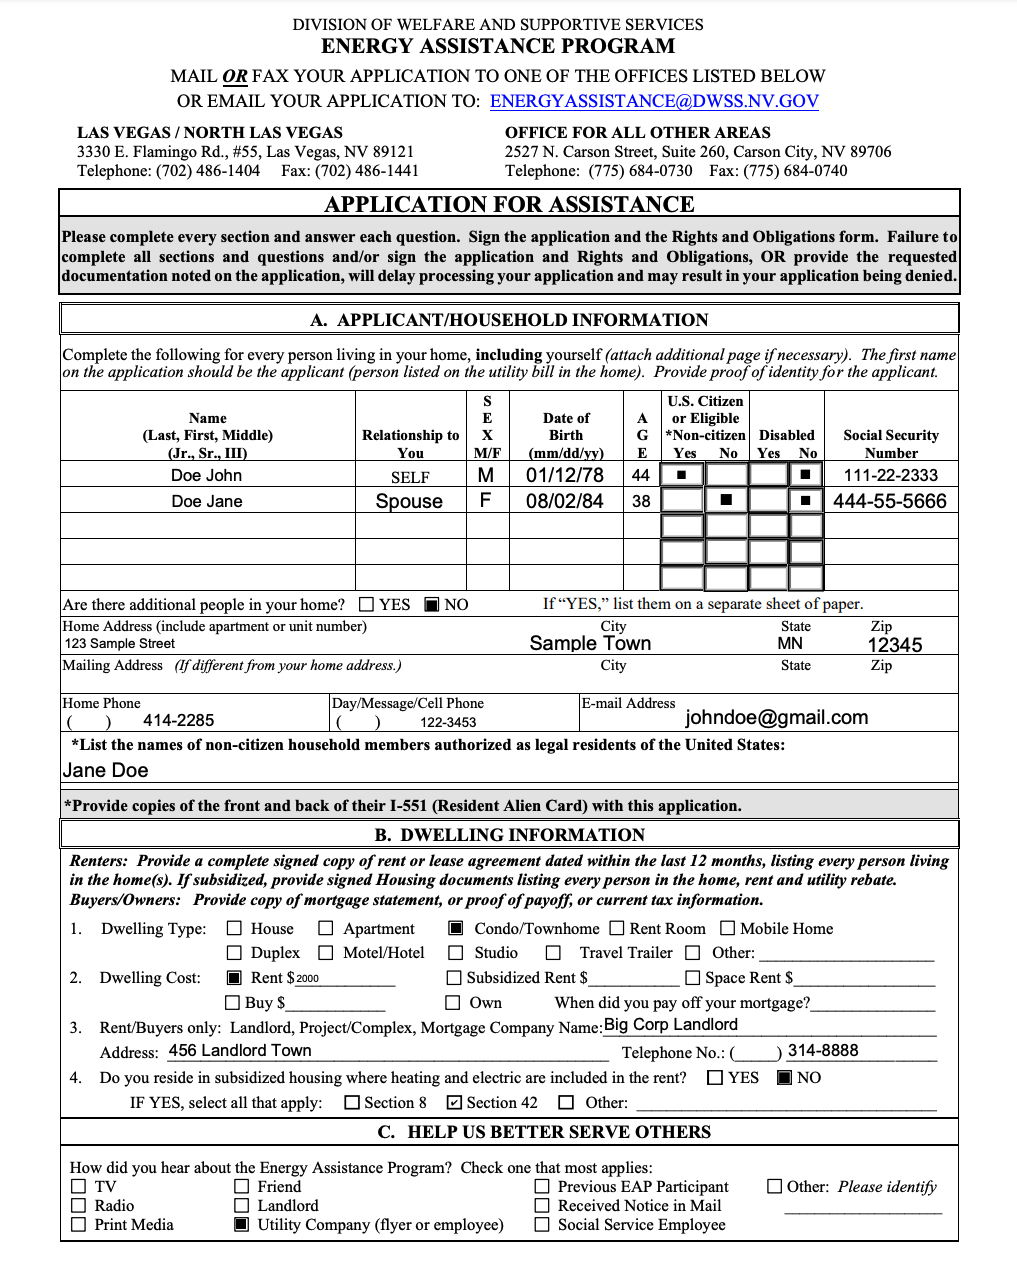

In [2]:
Image.open("../../../tests/fixtures/form.png")

In [3]:
document

This document holds the following data:
Pages - 1
Words - 494
Lines - 129
Key-values - 20
Checkboxes - 29
Tables - 1
Identity Documents - 0
Expense Documents - 0

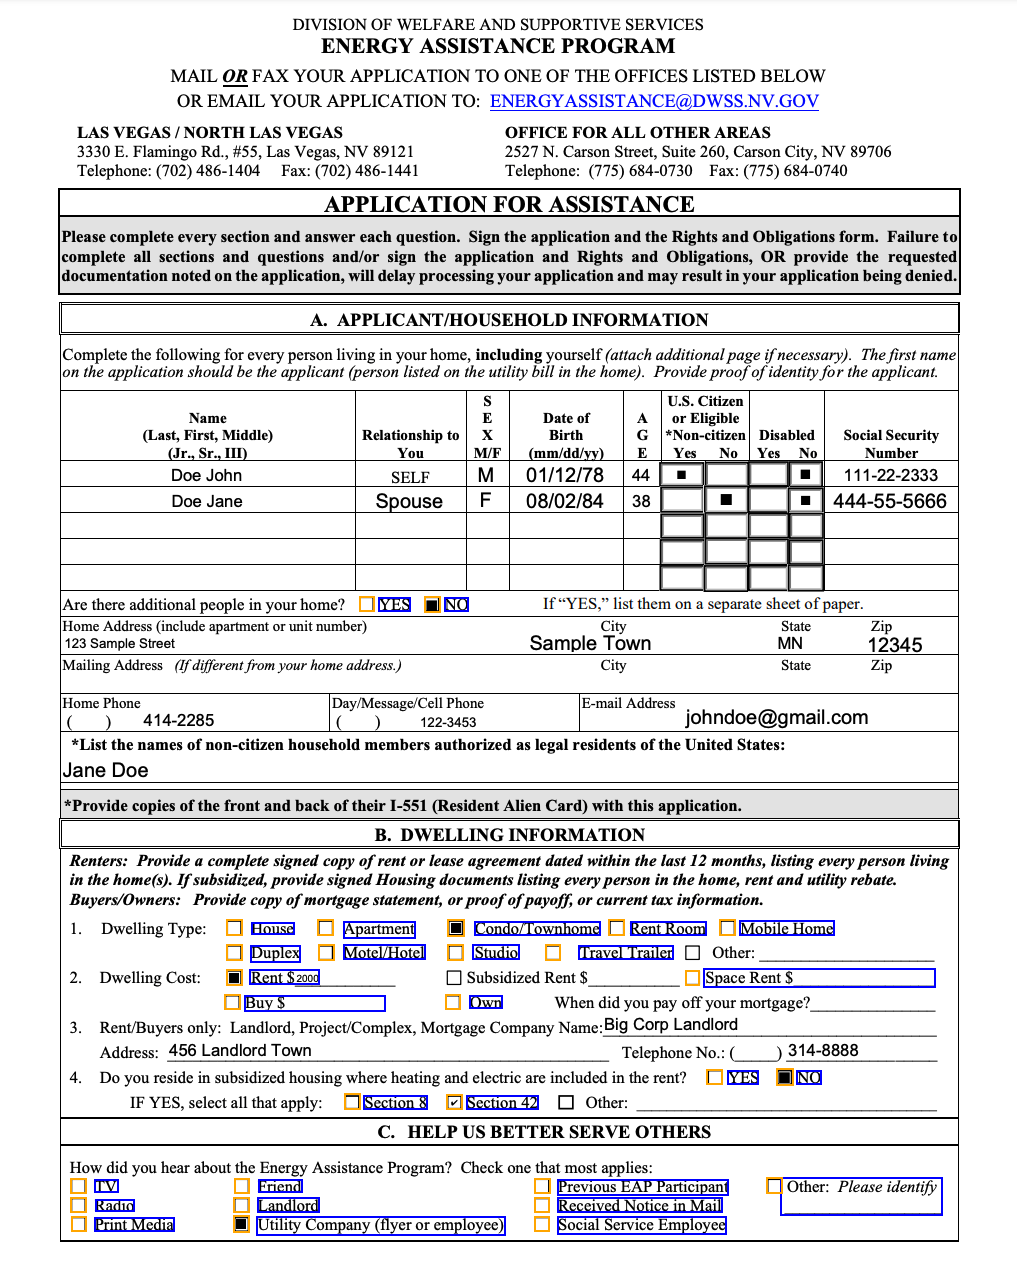

In [4]:
document.checkboxes.visualize()

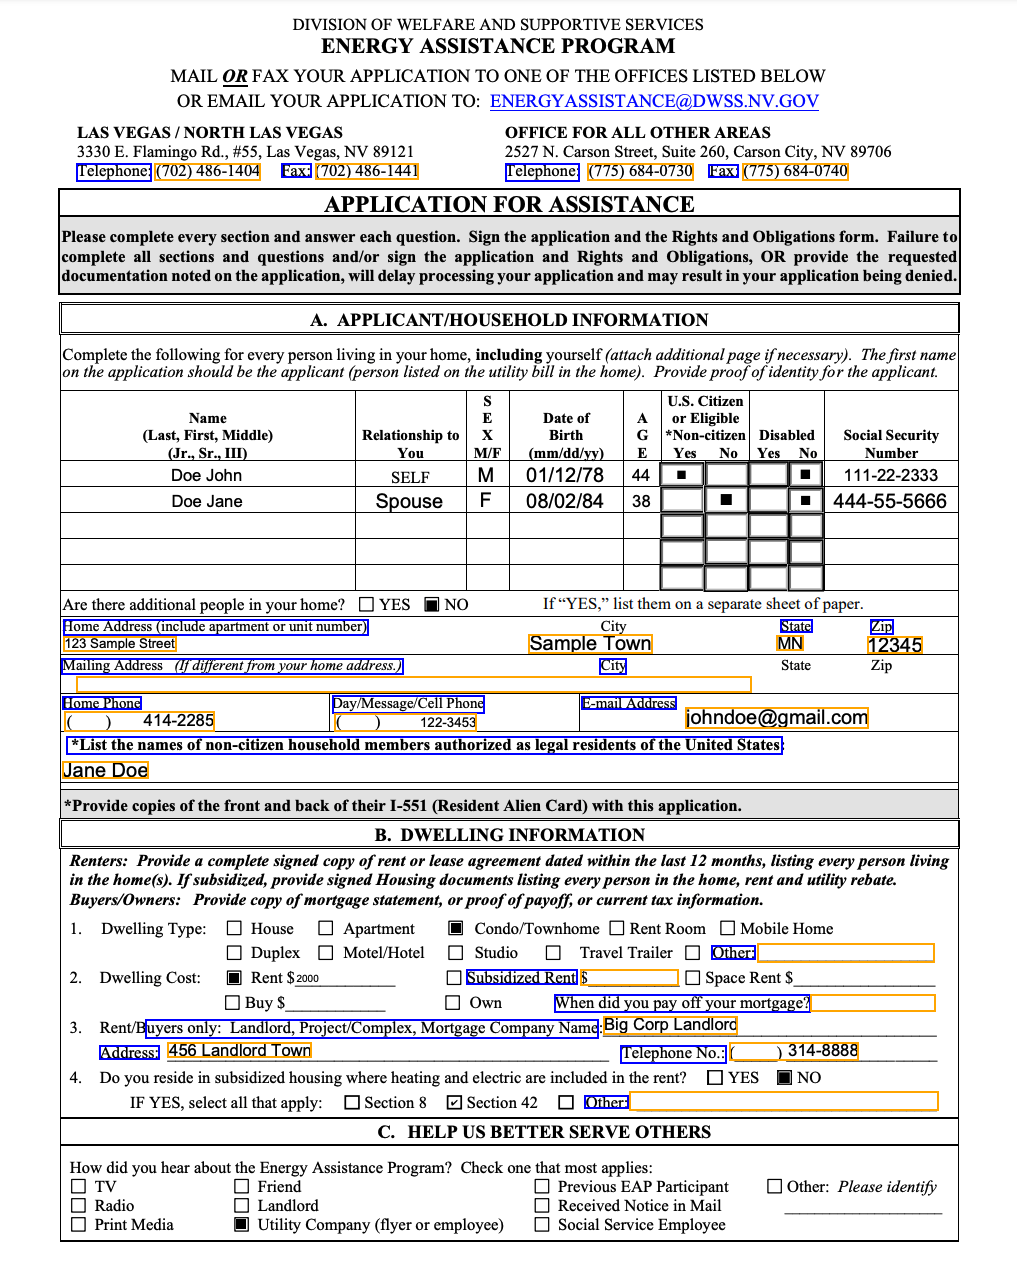

In [5]:
document.key_values.visualize()

## Visualizing the result of a search

Here we will be looking for the word "Rent".

In [6]:
words = document.search_words("Rent", top_k=10, similarity_threshold=0.1)

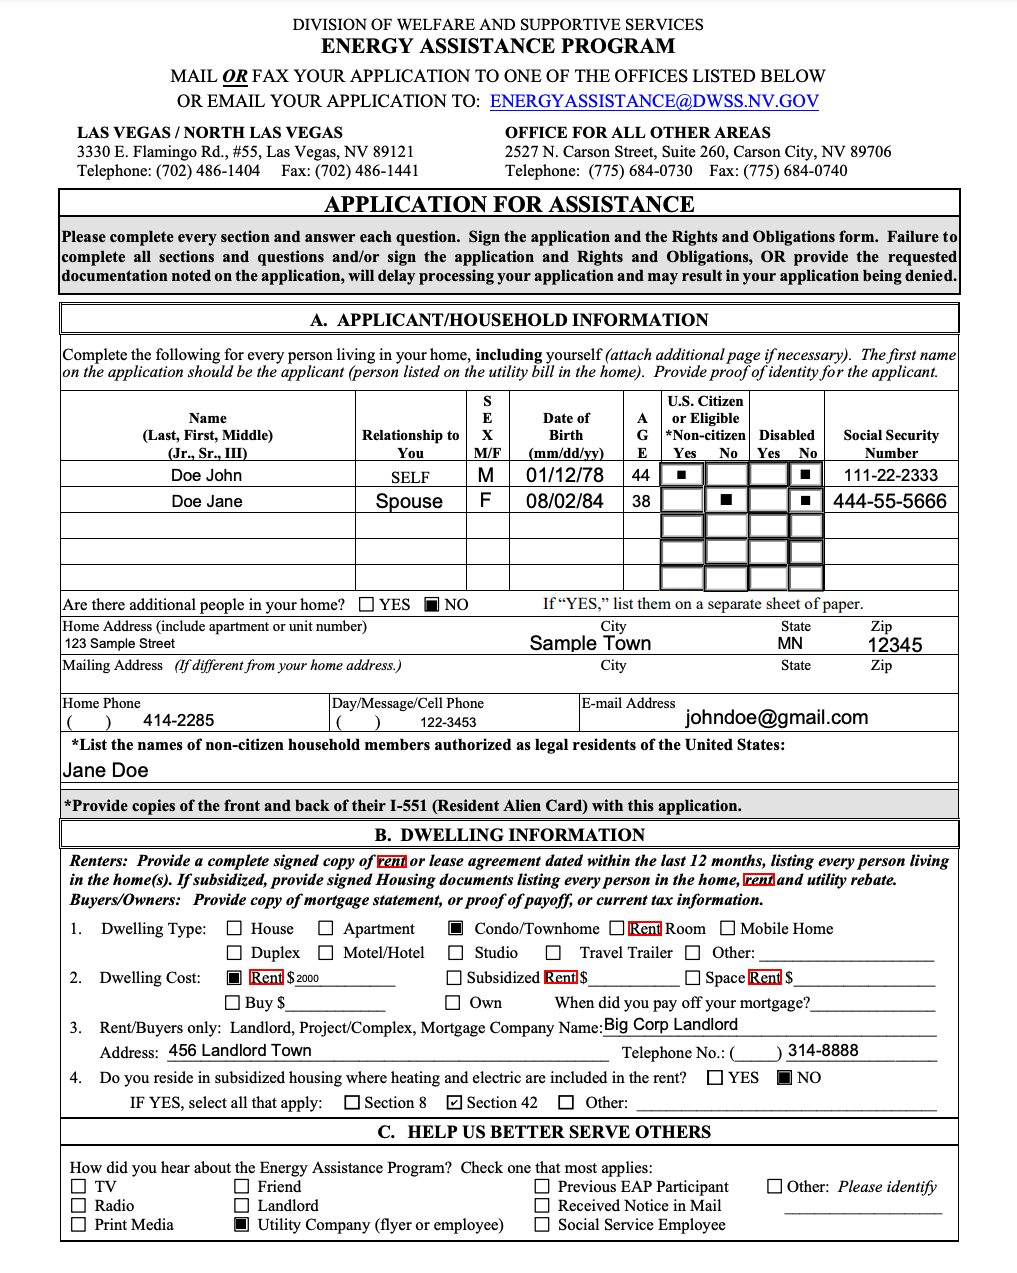

In [7]:
words.visualize()

## Visualizing Tables

Tables can be visualized as well (here) in purple.

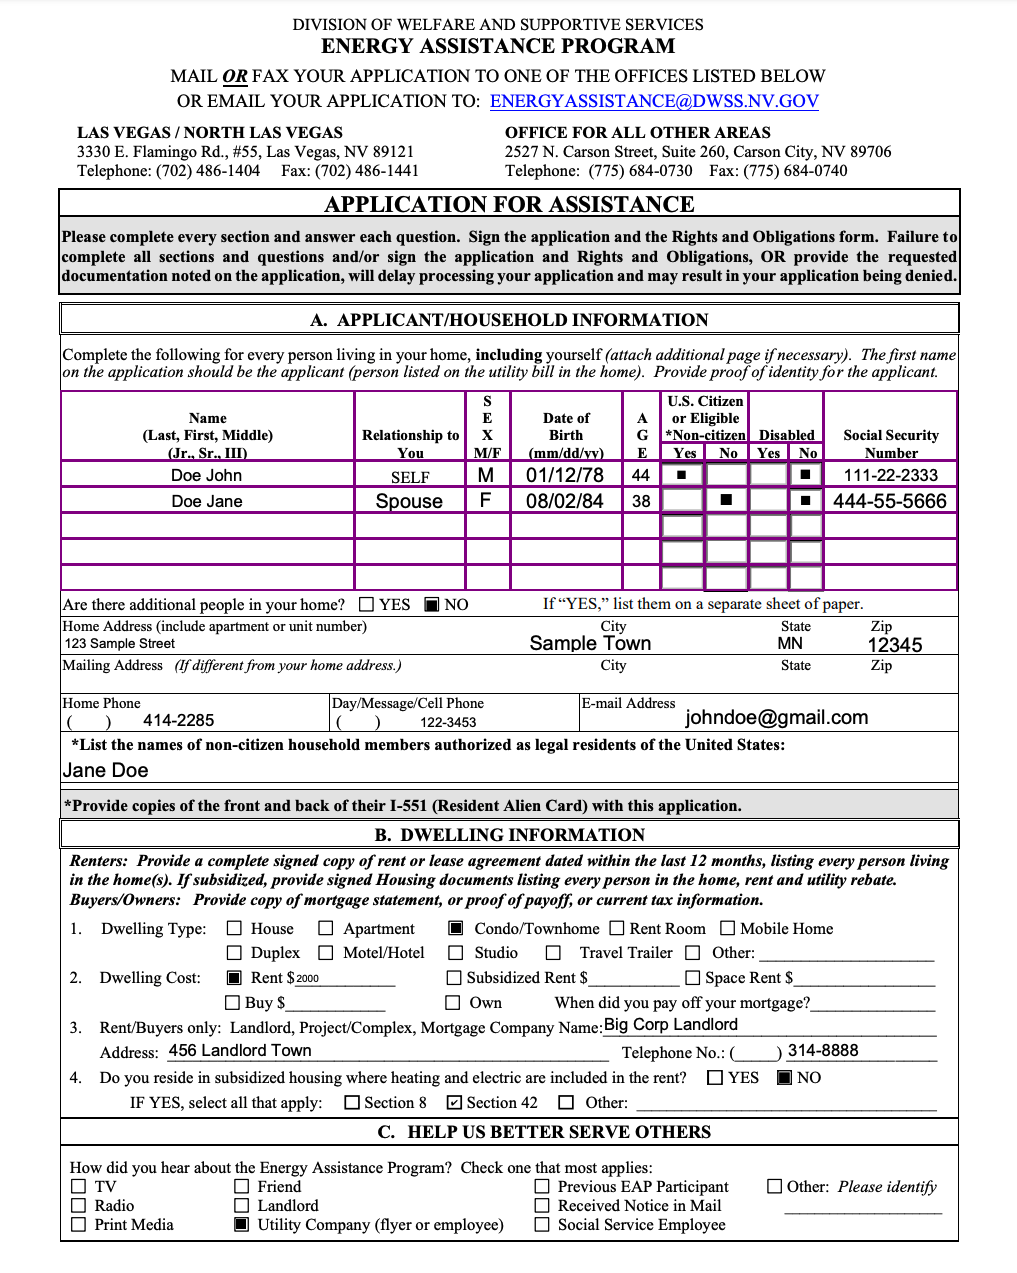

In [8]:
document.tables.visualize()

## Conclusion

Textractor packs visualization utilities that help you understand the Textract output to implement better heuristics.